<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/OAM_EM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

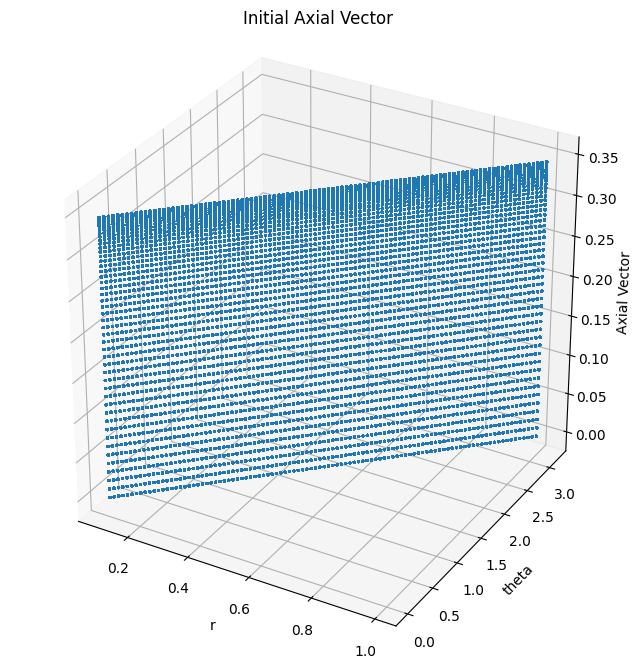

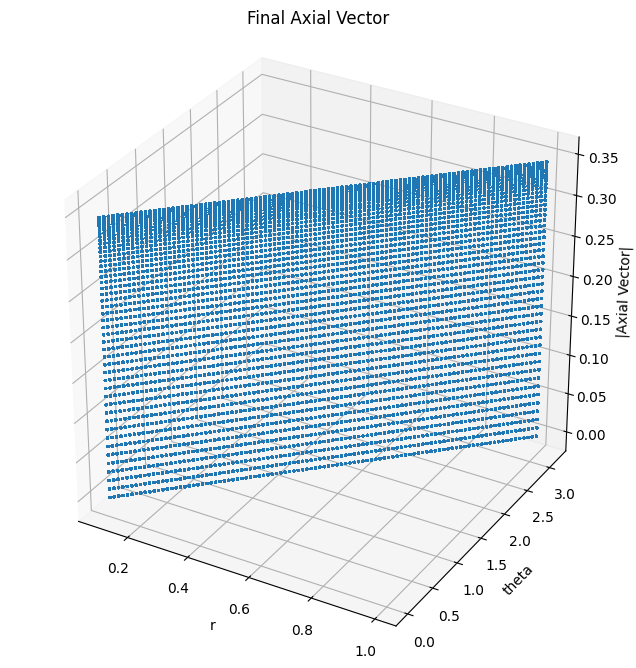

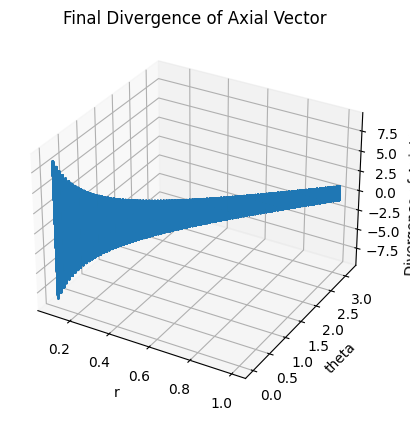

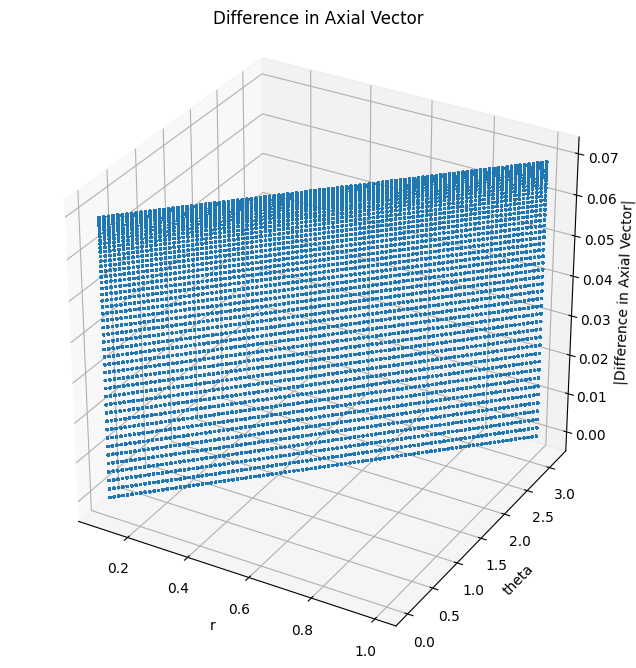

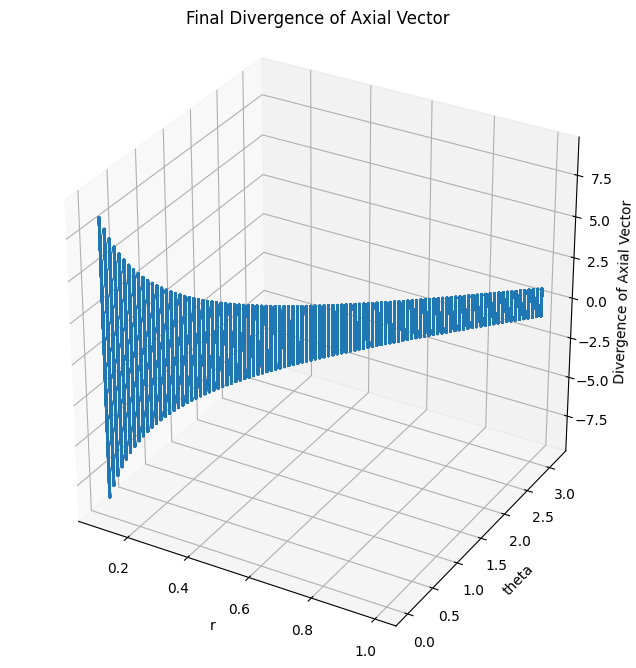

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
# Constants
l = 1
m = 1
alpha = 0.2
epsilon = 1e-9

# Define grid
r = np.linspace(0.1, 1, 100)
theta = np.linspace(0, np.pi, 100)
phi = np.linspace(0, 2 * np.pi, 100)

r, theta, phi = np.meshgrid(r, theta, phi, indexing='ij', sparse=True)

# Radial function
def phi_radial(r):
    return r**l * np.exp(-r)

# Derivative of radial function
def dPhi_dr(r):
    return l * r**(l - 1) * np.exp(-r) - r**l * np.exp(-r)

# Axial vector
def axial_vector(r, theta, phi, l, m):
    Y_lm = sph_harm(m, l, phi, theta)
    return (r / np.abs(r)) * Y_lm

# Divergence of phi * axial vector
def divergence_phi(r, theta, phi, l, m):
    Y_lm = sph_harm(m, l, phi, theta)
    dPhi_dr_val = dPhi_dr(r)
    return -np.sqrt((l + 1) / (2 * l + 1)) * (dPhi_dr_val + (l + 2) / r) * Y_lm \
           + np.sqrt(l / (2 * l + 1)) * (dPhi_dr_val - (l - 1) / r) * Y_lm

# Interaction with a phase shift alpha
def interaction(phi, alpha):
    return phi + alpha

# Calculate the initial and final axial vectors and their divergences:
initial_axial_vector = axial_vector(r, theta, phi, l, m)
initial_divergence = divergence_phi(r, theta, phi, l, m)

final_phi = interaction(phi, alpha)
final_axial_vector = axial_vector(r, theta, final_phi, l, m)
final_divergence = divergence_phi(r, theta, final_phi, l, m)

r_new = np.repeat(r, 10000).reshape((100, 10000))
theta_new = np.tile(theta, 10000).reshape((100, 10000))


# Define a function to create a 3D scatter plot with adjusted aspect ratio
def plot_3d_scatter(r, theta, data, title, xlabel, ylabel, zlabel):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(r.flatten(), theta.flatten(), data.flatten(), s=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    ax.set_box_aspect([1, 1, 1])
    plt.show()

# Plot initial axial vector
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(r_new.flatten(), theta_new.flatten(), np.abs(initial_axial_vector).flatten(), s=1)
#ax.set_xlabel('r')
#ax.set_ylabel('theta')
#ax.set_zlabel('Axial Vector')
#plt.show()

# Plot initial axial vector
plot_3d_scatter(r_new, theta_new, np.abs(initial_axial_vector), 'Initial Axial Vector', 'r', 'theta', 'Axial Vector')

#fig = plt.figure(figsize=(8, 6))
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(r_new.flatten(), theta_new.flatten(), np.abs(final_axial_vector).flatten(), s=1)
#ax.set_xlabel('r')
#ax.set_ylabel('theta')
#ax.set_zlabel('|Axial Vector|')
#plt.title('Final Axial Vector')
#plt.show()

# Plot final axial vector
plot_3d_scatter(r_new, theta_new, np.abs(final_axial_vector), 'Final Axial Vector', 'r', 'theta', '|Axial Vector|')

#fig = plt.figure(figsize=(8, 6))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(r_new.flatten(), theta_new.flatten(), final_divergence.flatten(), s=1)
ax.set_xlabel('r')
ax.set_ylabel('theta')
ax.set_zlabel('Divergence of Axial Vector')
plt.title('Final Divergence of Axial Vector')
plt.show()

###################

# Calculate the difference between the initial and final axial vectors
diff_axial_vector = final_axial_vector - initial_axial_vector

# Plot the difference in the axial vector
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(r_new.flatten(), theta_new.flatten(), np.abs(diff_axial_vector).flatten(), s=1)
#ax.set_xlabel('r')
#ax.set_ylabel('theta')
#ax.set_zlabel('|Difference in Axial Vector|')
#plt.title('Difference in Axial Vector')
#plt.show()

# Plot the difference in the axial vector
plot_3d_scatter(r_new, theta_new, np.abs(diff_axial_vector), 'Difference in Axial Vector', 'r', 'theta', '|Difference in Axial Vector|')

# Plot the Final Divergence of Axial Vector using the standardized plotting function
plot_3d_scatter(r_new, theta_new, final_divergence, 'Final Divergence of Axial Vector', 'r', 'theta', 'Divergence of Axial Vector')
